In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from copy import deepcopy

class State:
    def __init__(self, row, col = None):
        if type(row) in (list, tuple):
            self.row = row[0]
            self.col = row[1]
        else:
            self.row = row
            self.col = col

    def __eq__(self, p):
        if isinstance(p, State):
            return (self.row == p.row) & (self.col == p.col)
        elif type(p) in (list, tuple):
            return (self.row == p[0]) & (self.col == p[1])
        else:
            return super().__eq__(p)

    def getTuple(self):
        return (self.row, self.col)

    def __str__(self):
        return f'Row: {self.row}, Col: {self.col}'


class Simulator:
    """
    This class stores a data about the world, current policy and value
    function. It also provides a bunch of methods that facilitate
    RL-related operations visualizations.

    Properties:
        world    - numpy.array with the world. The numbers correspond to the
                   rewards for reaching each state
        policy   - numpy.array with policy. Policy is always deterministic.
                   The numbers represent specific actions:
                   0 (up), 1 (right), 2 (down), 3 (left)
        values   - numpy.array with the state-value function for each state
        reward   - aditional reward granted for performing each action
        terminal - a terminal state. It is an instance of the `State` class.

    Methods:
        move      - Returns a state that is the result of an action
        getReward - returns the reward for entering a specific state
        getValue  - returns a Value function for a determined state
        getPolicy - returns a policy for a determined state
        setValue  - sets a Value function for a determined state
        setPolicy - sets a policy for a determined state
        plot      - visualizes the world, value function and policy.
    """



    def __init__(self, world = None,
                 rows = None, cols = None,
                 terminal = None,
                 reward = 0,
                 startPos = (0, 0)):
        """
        Arguments:
            world      - matrix (numpy array) with rewards for etering each state
            rows, cols - size of the world. Works only if world is None
            terminal   - tuple with coordinates of the terminal state
            reward     - additional reward for each movement
            startPos   - starting position
        """
        if world is None:
            self.world = np.zeros((x, y))
        else:
            self.world = world

        self.values = np.zeros(self.world.shape)
        self.policy = np.random.randint(low=0, high=4, size=world.shape)

        self.reward = reward

        if terminal is not None:
            self.terminal = State(terminal)
        else:
            self.terminal = None

        self.pos = State(startPos)

        # Used only to facilitate the plotting code
        self.plotFigsize = [x/2 for x in self.world.shape[::-1]]



    def action2num(self, action):
        """
        Assigns numeric value for an action
        Arguments:
            action - Allowed actions are L(eft), R(right), U(p), D(down)
        Returns:
            1, 2, 3, 4 for U, R, D, L
        """
        if action in [0, 'U', 'Up', 'u', 'up']:
            return 0
        elif action in [1, 'R', 'Right', 'r', 'right']:
            return 1
        elif action in [2, 'D', 'Down', 'd', 'down']:
            return 2
        elif action in [3, 'L', 'Left', 'l', 'left']:
            return 3


    def move(self, start, action = None):
        """
            Returns a state that is the result of an action. If we are
            already in the terminal state, returns None
            Arguments:
                start - starting state (location). Can be defined as a
                        State object or as a tuple (x, y) (col, row)
                action - if given, the action is performed. If None,
                         the action is taken from the current policy.
            Returns:
                dest - a new location, after moving. An instance of a
                       State class.
        """

        if type(start) in [list, tuple]:
            start = State(start)

        if start == self.terminal:
            return None

        if action is None:
            action = self.getPolicy(start)

        dest = deepcopy(start)

        action = self.action2num(action)

        if action == 0:
            dest.row = max(start.row-1, 0)
        elif action == 1:
            dest.col = min(start.col+1, self.world.shape[1]-1)
        elif action == 2:
            dest.row = min(start.row+1, self.world.shape[0]-1)
        elif action == 3:
            dest.col = max(start.col-1, 0)

        return dest

    def execute(self, action):
        """
        Performs a given action.
        THERE IS NO NEED TO USE THIS FUNCTION IN DP RELATED TASKS
        Arguments:
            action - Allowed actions are 0 (up), 1 (right), 2 (down), 3 (left)
        Returns:
            state, terminal, reward
        """
        self.pos = self.move(self.pos, action)

        if self.terminal is None:
            terminal = False
        else:
            terminal = self.terminal == self.pos


        return self.getState(), terminal, self.getReward()

    def getState(self):
        """
        Not implemented. No need to use this function in Dynamic Programming task.
        """
        return None


    def getValue(self, state):
        """
        Returns a Value function for a determined state (location)
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
        """
        if type(state) in (list, tuple):
            state = State(state)

        return self.values[state.row][state.col]

    def getPolicy(self, state):
        """
        Returns a policy function for a determined state (location).
        Policies  can be: 0 (up), 1 (right), 2 (down), 3 (left)
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
        """
        if type(state) in (list, tuple):
            state = State(state)

        return self.policy[state.row][state.col]


    def setValue(self, state, value):
        """
        Sets a Value function for a determined state (location).
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
            value - value to be set
        """
        if type(state) in (list, tuple):
            state = State(state)

        self.values[state.row][state.col] = value

    def setPolicy(self, state, value):
        """
        Sets a policy function for a determined state (location).
        Policies  can be: 0 (up), 1 (right), 2 (down), 3 (left)
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
            value - value to be set
        """
        if type(state) in (list, tuple):
            state = State(state)

        self.policy[state.row][state.col] = value



    def getReward(self, state = None):
        """
        Returns a reward for entering a determined state (location).
        Arguments:
            state - a location we are interested in. An instance of a State
                    class or a tupple (row, col)
        """

        if state is None:
            state = self.pos

        if type(state) in (list, tuple):
            state = State(state)

        return self.world[state.row][state.col] + self.reward


    def plot(self):
        """
        Wisualizes the world, value function and policy.
        """
        fig = plt.figure(figsize=(1.5 * self.world.shape[1], self.world.shape[0]/2))

        subfigs = fig.subfigures(1, 3)

        for outerind, subfig in enumerate(subfigs.flat):
            subfig.suptitle(f'Subfig {outerind}', y=0.1)

            if outerind == 0:
                self.plotWorld(subfig = subfig)
                subfig.suptitle('World', y=0.1)
            if outerind == 1:
                self.plotValues(subfig = subfig)
                subfig.suptitle('Values $v_\pi$', y=0.1)
            if outerind == 2:
                self.plotPolicy(subfig = subfig, show_world = True)
                subfig.suptitle('Policy $\pi$', y=0.1)


        plt.show()


    def plotValGrid(self, valmatrix, subfig = None, cmap = plt.cm.PuBu_r):
        """
        Visualizes numeric values.
        """
        if subfig is None:
            f, plothandles = plt.subplots(
                self.world.shape[0], self.world.shape[1],
                sharex=True, sharey=True,
                gridspec_kw = {'wspace' : 0, 'hspace' : 0},
                figsize = self.plotFigsize
            )
        else:
            plothandles = subfig.subplots(
                self.world.shape[0], self.world.shape[1],
                gridspec_kw = {'wspace' : 0, 'hspace' : 0},
            )

        valmin = valmatrix.min()
        valmax = valmatrix.max()
        norm = matplotlib.colors.Normalize(vmin=2*valmin, vmax=valmax)
        for row_h, row_v in zip (plothandles, valmatrix):
            for ax, val in zip (row_h, row_v):
                ax.xaxis.set_visible(False)  # hide the x axis
                ax.yaxis.set_visible(False)  # hide the y axis

                if valmin == valmax:
                    bgcolor = 'white'
                else:
                    bgcolor=cmap(norm(val))
                ax.set_facecolor(bgcolor)
                ax.text(0.1, 0.4, f'{np.round(val, 1):.1f}')

        if self.terminal is not None:
            ax = plothandles[self.terminal.row][self.terminal.col]
            ax.set_facecolor('red')

        if subfig is None:
            plt.show()


    def plotWorld(self, subfig = None):
        """
        Visualizes the world.
        """
        self.plotValGrid(valmatrix = self.world, subfig = subfig)


    def plotValues(self, subfig = None):
        """
        Visualizes the state-value function.
        """
        self.plotValGrid(valmatrix = self.values, subfig = subfig)



    def plotPolicy(self, show_world = False, subfig = None):
        """
        Visualizes the policy.
        """
        if subfig is None:
            f, plothandles = plt.subplots(
                self.policy.shape[0], self.policy.shape[1],
                sharex=True, sharey=True,
                gridspec_kw = {'wspace' : 0, 'hspace' : 0},
                figsize = self.plotFigsize
            )
        else:
            plothandles = subfig.subplots(
                self.policy.shape[0], self.policy.shape[1],
                gridspec_kw = {'wspace' : 0, 'hspace' : 0},
            )

        if show_world:
            cmap = plt.cm.PuBu_r
            norm = matplotlib.colors.Normalize(vmin=2*self.world.min(), vmax=self.world.max())

        for row, (row_h, row_p) in enumerate(zip (plothandles, self.policy)):
            for col, (ax, action) in enumerate(zip (row_h, row_p)):
                ax.xaxis.set_visible(False)  # hide the x axis
                ax.yaxis.set_visible(False)  # hide the y axis

                action = self.action2num(action)

                if action == 0:
                    arrow = r'$\uparrow$'
                elif action == 1:
                    arrow = r'$\rightarrow$'
                elif action == 2:
                    arrow = r'$\downarrow$'
                elif action == 3:
                    arrow = r'$\leftarrow$'

                if show_world:
                    bgcolor=cmap(norm(self.world[row][col]))
                    ax.set_facecolor(bgcolor)

                if ((row, col) == self.terminal):
                    ax.set_facecolor('red')
                else:
                    ax.plot(0.4, 0.4, linestyle='none', marker=arrow, color='red', markersize=10)

        if subfig is None:
            plt.show()

In [ ]:
import numpy as np
from helper import State, Simulator

%matplotlib inline

ImportError: ignored

# World description
### Actions
Our world is a grid world. An agent can move the world travelling in four main directions, so four actions are possible:
- 0 (up)
- 1 (right)
- 2 (down)
- 3 (left)

Each action moves us to the corresponding state. If it is impossible to be moved, we are staying in the same state. There is also a terminal state (marked red). Reaching a terminal state ends the episode.

### States
A state is a location of the agent. A standard way to describe the state is by using an instance of a `State` class. Such an object has two properties: `state.row` and `state.col` that are describing the position of the agent. Both rows and cols are counted from `0`, so the upper left corner corresponds to `(0, 0)` state. Another way of describing a state is by using a tuple `(row, col)`. Such a format is also accepted by methods implemented in a simulator.

### Rewards
For each move a negative reward `Reward = -1` is granted. Aditionally, for entering each state a reward associated with this state is granted.



# Simulator Description
A main goals of a simulator are as follows:
- store the data about the world
- store the current policy
- store the current value function
- facilitate RL-related operations

#### Properties:
- `world` - numpy.array with the world. The numbers correspond to the rewards for reaching each state
- `policy` - numpy.array with policy. Policy is always deterministic. The numbers represent specific actions: 0 (up), 1 (right), 2 (down), 3 (left)
- `values` - numpy.array with the state-value function for each state
- `reward` - aditional reward granted for performing each action
- `terminal` - a terminal state. It is an instance of the `State` class.

#### Methods:
- `move` - Returns a state that is the result of an action.
- `getReward` - Returns the reward for entering a specific state (location).
- `getValue` - Returns a Value function for a determined state (location).
- `getPolicy` - Returns a policy for a determined state (location).
- `setValue` - Sets a Value function for a determined state (location).
- `setPolicy` - Sets a policy for a determined state (location).
- `plot` - Visualizes the world, value function and policy.



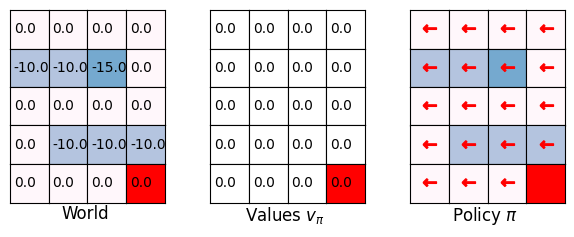

In [ ]:
world = np.array([
    [ 0,    0,   0,  0],
    [-10, -10, -15,  0],
    [ 0,   0,   0,   0],
    [ 0, -10, -10, -10],
    [ 0,   0,   0,   0],
])



sim = Simulator(
    world = world, # Our World
    terminal = [x-1 for x in world.shape], # t. state in lower right corner
    reward = -1 # Reward for each step
    )

sim.policy = 3 + sim.world * 0
sim.plot()

#### Reward, Value, Policy
We can communicate with world, reading Rewards, Value functions and
Let's see how it works

In [ ]:
#Let's start with state (location) 1, 2 (row nr 1, column nr 2)

def displayStateData(sim, state):
    print (f'Reward: {sim.getReward(state)}')
    print (f'Value: {sim.getValue(state)}')
    print (f'Policy: {sim.getPolicy(state)}')

displayStateData(sim, (1, 2))

Reward: -16
Value: 0.0
Policy: 3


##### Setting values and policies.

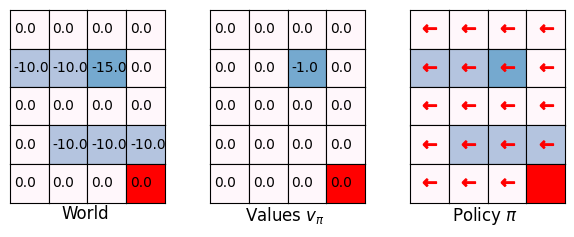

In [ ]:
sim.setValue((1, 2), -1)
sim.plot()

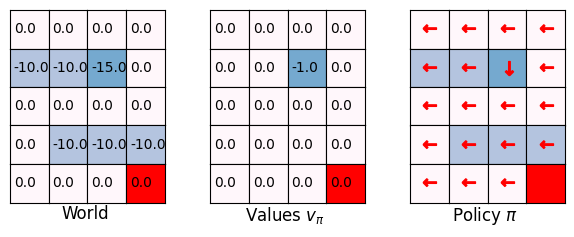

In [ ]:
sim.setPolicy((1, 2), 2)
sim.plot()

#### Using `State` class

In [ ]:
state = State((1, 2))

print (f'State: {state}')
print (f'Row: {state.row}')
print (f'Col: {state.col}')

State: Row: 1, Col: 2
Row: 1
Col: 2


In [ ]:
displayStateData(sim, state)

Reward: -16
Value: -1.0
Policy: 2


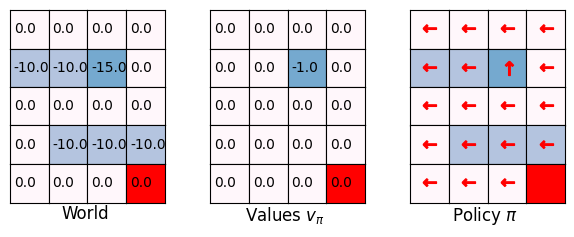

In [ ]:
sim.setPolicy(state, 0)
sim.plot()

#### Using `simulator.move()` method
There are two ways of using `simulator.move()` method. In the first version, you provide two arguments:
- `state` - the starting location that you want to move from. It may be either an instance of a `State` class or a tupple with (row, col) coordinates
- `action` - action to be performed. One of: 0 (up), 1 (right), 2 (down), 3 (left)

The method returns a destination state (an instance of the `State()` class)

In [ ]:
print (sim.move(state, 1)) # move right from (1, 2) point
print (sim.move((0, 0), 3)) # Move left from (0, 0) point

Row: 1, Col: 3
Row: 0, Col: 0


In the second version you should just provide a starting location (state) that you want to move from. The action is selected from the current policy.

In [ ]:
print (sim.move(state)) # move from (1, 2) point, according to the policy (up)
print (sim.move((3, 0))) # Move from (3, 0) point, according to the policy (left)

Row: 0, Col: 2
Row: 3, Col: 0


# TO DO
Create a code that uses one of DP algorithms to find an optimal policy for the given world.
To pass the assignment you have to:
- show that your code works
- understand the code
- understand the theory behind the code
- understand the general idea of dynamic programming.

*Note 1: It is not necessary to use the simulator, but you should at least consider it. It will make your life much easier.*

*Note 2: You may use any discount rate you wish, but I recommend you to discount your rewards (use something < 1, eg. 0.9)*

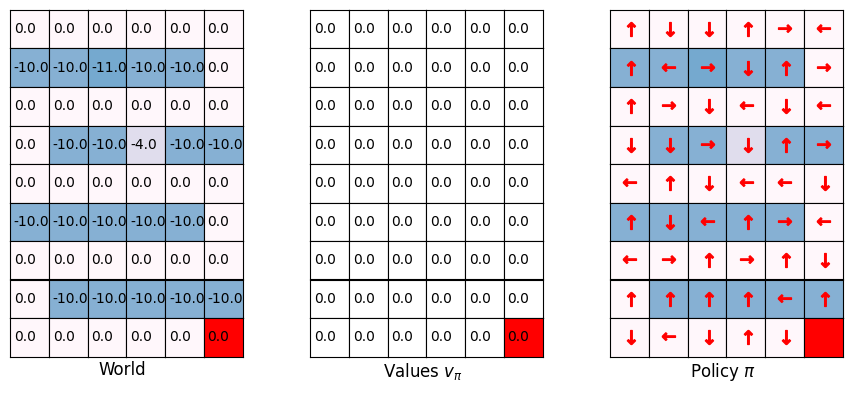

In [ ]:
world = -np.array([
    [ 0,  0,  0,  0,  0,  0],
    [10, 10, 11, 10, 10,  0],
    [ 0,  0,  0,  0,  0,  0],
    [ 0, 10, 10,  4, 10, 10],
    [ 0,  0,  0,  0,  0,  0],
    [10, 10, 10, 10, 10,  0],
    [ 0,  0,  0,  0,  0,  0],
    [ 0, 10, 10, 10, 10, 10],
    [ 0,  0, 0,   0,  0,  0],
])


sim = Simulator(
    world = world, # Our World
    terminal = [x-1 for x in world.shape], # t. state in lower right corner
    reward = -1 # Reward for each step
    )

sim.plot()

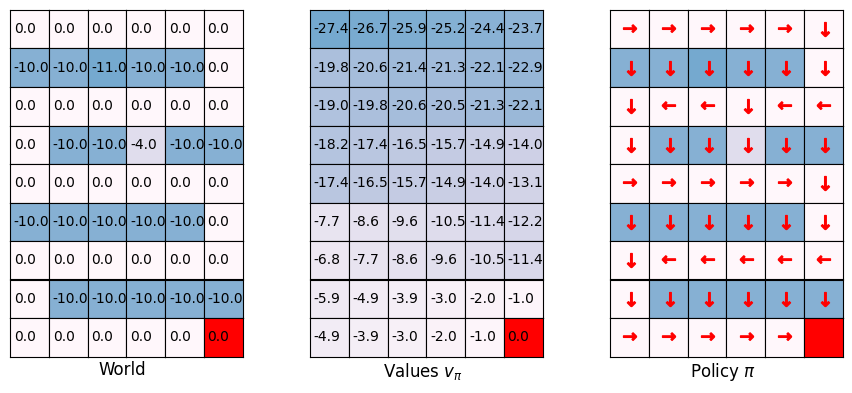

In [ ]:
gamma = 0.99

delta = 1
theta = 1e-9

for k in range(1000):
    for i in range(10):
        for i in range(sim.world.shape[0]):
            for j in range(sim.world.shape[1]):
                state = State(i, j)
                new_state = sim.move(state)
                value = sim.getValue(state)
                if (new_state):
                    v = sim.getReward(new_state) + gamma * sim.getValue(new_state)
                    sim.setValue(state, v)
                    delta = max(delta, abs(v - value))

    for i in range(sim.world.shape[0]):
        for j in range(sim.world.shape[1]):
            state = State(i, j)
            if (state == sim.terminal):
                continue
            max_value = -np.inf
            max_action = -1
            for action in range(4):
                new_state = sim.move(state, action)
                v = sim.getReward(new_state) + gamma * sim.getValue(new_state)
                if (v > max_value):
                    max_value = v
                    max_action = action
            sim.setPolicy(state, max_action)


sim.plot()